In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/kaggle/input/dataset-sports/DATA_STUDENTS.csv', delimiter=';')
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types and general info
print(df.info())

# Summarize numeric columns
print(df.describe())

# Rename columns if necessary (remove spaces from column names)
df.rename(columns={'Jump _distance_cm': 'Jump_distance_cm'}, inplace=True)

# Convert columns to appropriate data types
df['ID'] = df['ID'].astype(int)
df['Age_Y'] = df['Age_Y'].astype(int)
df['Weight_Kg'] = df['Weight_Kg'].astype(float)
df['Height_cm'] = df['Height_cm'].astype(float)
df['BMI'] = df['BMI'].astype(float)
df['Speed_m/s'] = df['Speed_m/s'].astype(float)
df['Jump_distance_cm'] = df['Jump_distance_cm'].astype(float)

# Encode Gender as numeric (0 for Female, 1 for Male)
df['Gender'] = df['Gender'].map({'female': 0, 'male': 1})

# Fill missing numeric values with the median
for col in ['Age_Y', 'Weight_Kg', 'Height_cm', 'BMI', 'Speed_m/s', 'Jump_distance_cm']:
    df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values remain
print(df.isnull().sum())

   ID  Age_Y  Gender  Weight_Kg  Height_cm  BMI  Speed_m/s  Jump _distance_cm
0   1     13  female       43.0        160   17       4.90                189
1   2     13  female       47.0        158   19       5.15                267
2   3     12    male       41.0        151   18       5.95                316
3   4     12    male       44.0        145   21       4.72                203
4   5     12    male       36.0        146   17       5.32                308
ID                   0
Age_Y                0
Gender               0
Weight_Kg            0
Height_cm            0
BMI                  0
Speed_m/s            0
Jump _distance_cm    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1851 non-null   int64  
 1   Age_Y              1851 non-null   int64  
 2   Gender             1851 non-null

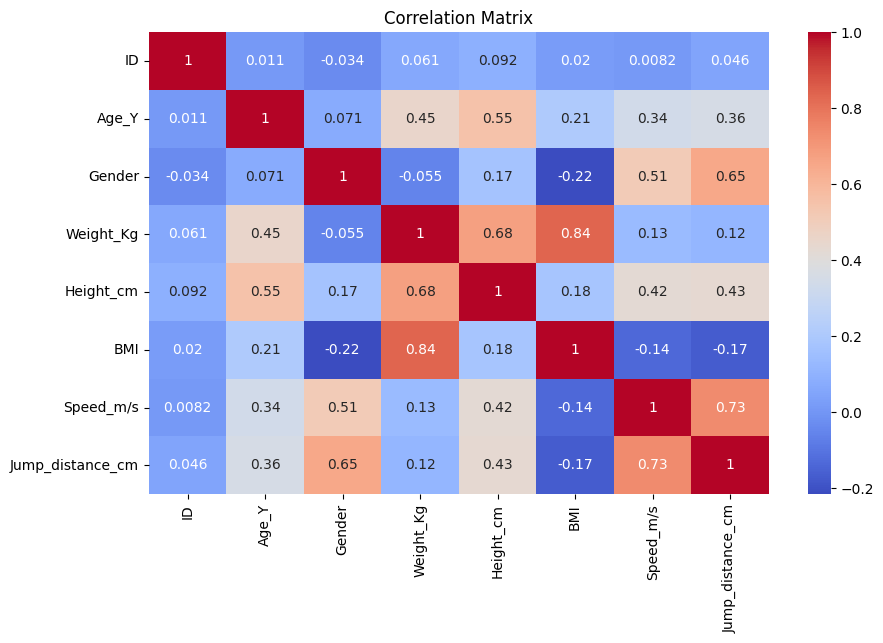

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


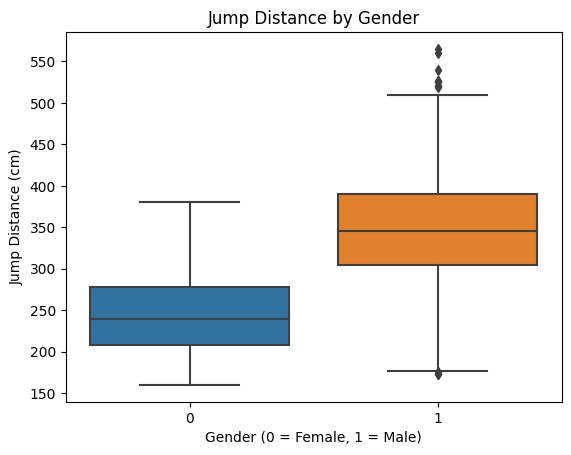

In [3]:
# Box plot for Jump Distance by Gender
sns.boxplot(data=df, x='Gender', y='Jump_distance_cm')
plt.title('Jump Distance by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Jump Distance (cm)')
plt.show()


In [4]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('/kaggle/working/cleaned_dataset.csv')

# Feature selection
X = data[['Age_Y', 'Gender', 'Weight_Kg', 'Height_cm', 'BMI', 'Speed_m/s']]
y = data['Jump_distance_cm']

# Splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")




Mean Squared Error: 2375.9583440514375
R^2 Score: 0.6224509440884238


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load your cleaned dataset
data = pd.read_csv('/kaggle/working/cleaned_dataset.csv')

# Features and target
X = data.drop(columns=['Jump_distance_cm'])  # Replace with your target column
y = data['Jump_distance_cm']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to test
models = {
    'Ridge Regression': Ridge(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Hyperparameter grids
param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10, 100]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Optimize each model
best_models = {}
for name, model in models.items():
    print(f"Optimizing {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")

# Evaluate each model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  R^2 Score: {r2:.2f}")
    print("-" * 40)


Optimizing Ridge Regression...
Best parameters for Ridge Regression: {'alpha': 1}
Optimizing Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Ridge Regression Performance:
  Mean Squared Error: 2345.28
  R^2 Score: 0.63
----------------------------------------
Gradient Boosting Performance:
  Mean Squared Error: 2074.20
  R^2 Score: 0.67
----------------------------------------


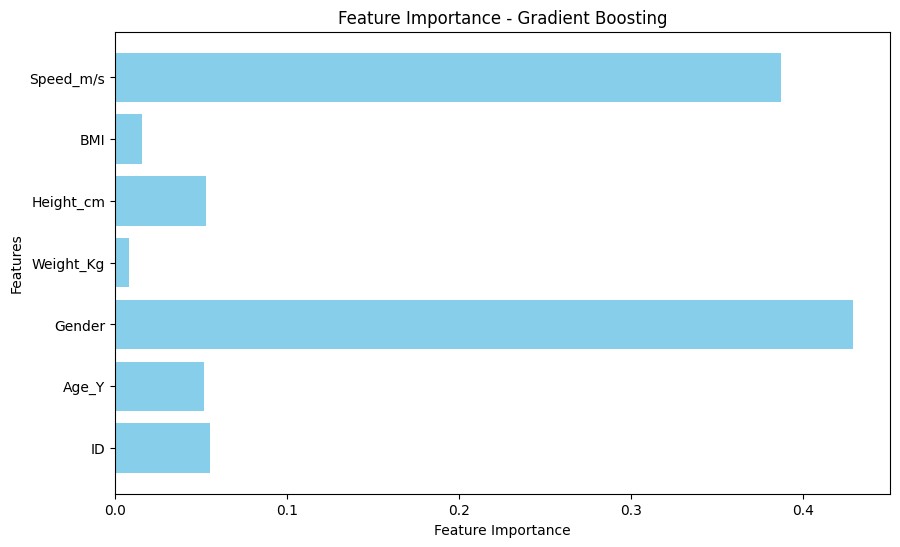

In [7]:
import matplotlib.pyplot as plt

# Plot feature importance for Gradient Boosting
feature_importance = best_models['Gradient Boosting'].feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Gradient Boosting')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_models['Gradient Boosting'], X, y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R²: {np.mean(scores):.2f}")


Cross-validated R² scores: [0.60044807 0.57414089 0.73061735 0.59439891 0.12225575]
Mean R²: 0.52


In [9]:
# Ensure the new data matches the feature names used during training
new_data = pd.DataFrame({
    'ID': [0],  # Ensure this matches the training data column name
    'Age_Y': [25],  # Replace with realistic values
    'Gender': [1],  # Male = 1
    'Weight_Kg': [70],
    'Height_cm': [175],
    'BMI': [22.9],
    'Speed_m/s': [5.2]
})

# Predict using the Gradient Boosting model
predicted_jump_distance = best_models['Gradient Boosting'].predict(new_data)
print(f"Predicted Jump Distance: {predicted_jump_distance[0]:.2f} cm")


Predicted Jump Distance: 334.33 cm
